# Statistic

In [1]:
import os
import random
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pylab as plt

import seaborn as sns

from sklearn.datasets import load_iris


from math import sqrt
from scipy.stats import norm,binom,poisson,shapiro,bernoulli


In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
N_SAMPLE = 5000


CMAP = plt.cm.rainbow
plt.set_cmap(CMAP)
plt.style.use('seaborn-v0_8-darkgrid')

TEST_SIZE = 0.20

<Figure size 640x480 with 0 Axes>

In [3]:
def fn_gen_data(n_sample = 50,
                dist = 'uniform',
                random_var = 0):
    if dist == 'uniform':
        d=np.random.random(size=n_sample)
    
    if dist == 'normal':
        d=np.random.normal(loc=1-random_var,
                           scale=1+random_var,
                           size=n_sample)
        
    if dist == 'binomial':
        d=np.random.binomial(n=10,p=0.5+random_var/10,
                             size = n_sample)
        
    if dist == 'exponential':
        d = np.random.exponential(scale=0.5+random_var,
                                  size=n_sample)
        
    if dist == 'poisson':
        d = np.random.poisson(lam=1.0+random_var,size=n_sample)
        
    if dist == 'laplace':
        d = np.random.laplace(loc=0.0,scale=1.0,size=n_sample)
        
    d = d+np.abs(d.min())
    d = d/(d.max()-d.min())
    
    return d
        

In [4]:
def fn_plot_data(data,
                 binwidth = 0.1,
                 title = 'Uniform'):
    
    sns.histplot(data, kde=True,
                 binwidth=binwidth,
                 binrange=(0,1),
                 kde_kws={'bw_adjust':1.5},
                 element='step')
    #add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'{title.title()} Distribution')
    plt.grid(True)
    
    plt.show() # show the plot
    

## Uniform Distribution

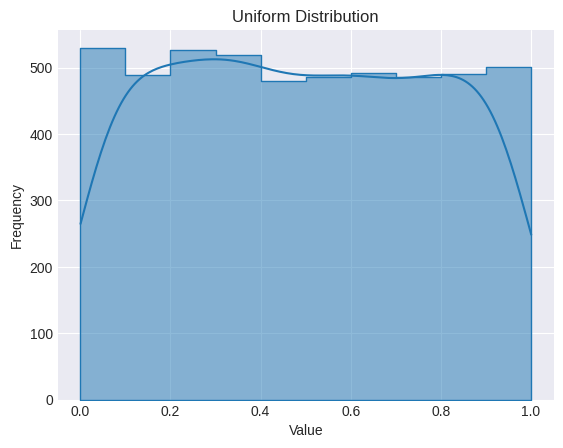

In [5]:
#return random floats in the half-open interval[0.0,1.0)

dist_type = 'uniform'
data_uniform =fn_gen_data(n_sample=N_SAMPLE,
                          dist=dist_type,
                          random_var=0)
fn_plot_data(data_uniform, title= dist_type)

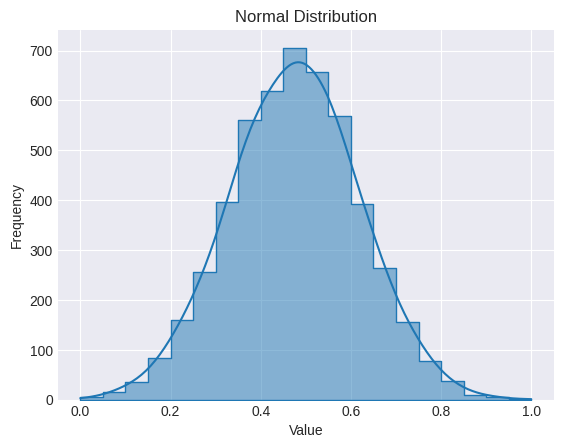

In [6]:
dist_type = 'normal'
data =fn_gen_data(n_sample=N_SAMPLE,
                          dist=dist_type,
                          random_var=0)
fn_plot_data(data,0.05, title= dist_type)

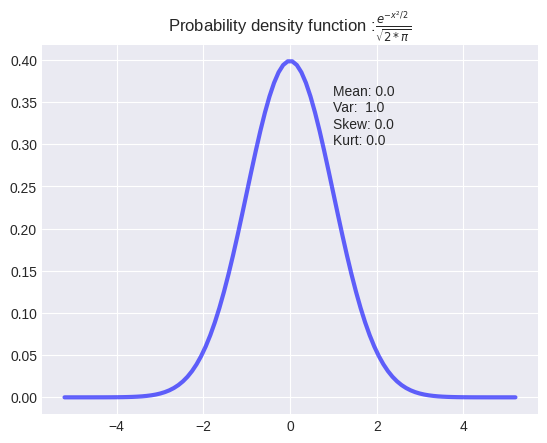

In [7]:
mean,var,skew,kurt = norm.stats(moments = 'mvsk')

eps = 1e-7

x = np.linspace(norm.ppf(eps),
                norm.ppf(1-eps),
                100)

plt.plot(x,norm.pdf(x),
         'b-',lw=3,alpha=0.6,label = 'norm pdf')
plt.title("Probability density function :$\\frac{e^{-x^2/2}} {\sqrt{2 * \pi}}$",fontsize = 12) #to print equation on plot title use $
plt.text(1,.3,f'Mean: {mean}\nVar:  {var}\nSkew: {skew}\nKurt: {kurt}')
plt.grid(True)
plt.show()



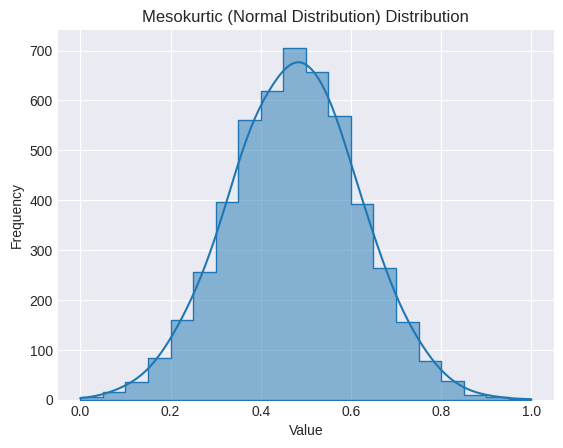

In [8]:
#Mesokurtic Distribution(Normal Distribution)
fn_plot_data(data,0.05,title="Mesokurtic (Normal Distribution)")


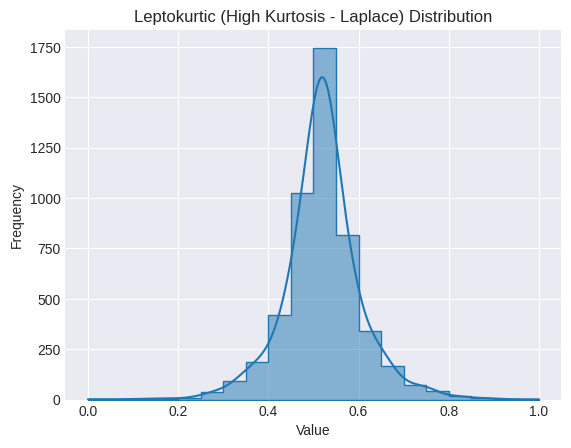

In [9]:
# 2. Leptokurtic Distribution (High Kurtosis - Laplace)
#using a laplace distribution which has fatter 
dist_type = 'laplace'

data_leptokurtic = fn_gen_data(n_sample=N_SAMPLE,
                               dist=dist_type,
                               random_var=0)

fn_plot_data(data_leptokurtic,0.05,
             title="Leptokurtic (High Kurtosis - Laplace)")